In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from keras.models import Model, load_model
#from scipy.fftpack import fftn,fftshift
import tensorflow as tf
from keras import backend as K

#Block of code to configure whether to use CPU or GPU and how to utilize them
GPU=True
CPU=False
num_cores = 8

if GPU:
    num_GPU = 1
    num_CPU = 1
if CPU:
    num_CPU = num_cores
    num_GPU = 0

config = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=num_cores,\
        inter_op_parallelism_threads=num_cores, allow_soft_placement=True,\
        device_count = {'CPU' : num_CPU, 'GPU' : num_GPU},\
                       )
session = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(session)
#End CPU/GPU config block

%matplotlib inline
plt.style.use('seaborn-white')
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
matplotlib.rc('font',family='Times New Roman')
matplotlib.rcParams['font.size'] = 30
plt.viridis()

h,w=32,32

<Figure size 432x288 with 0 Axes>

## Load test data

In [3]:
real_intens_test=np.load('test_data/real_intens_test.npy') #Ground truth object
real_phase_test=np.load('test_data/real_phase_test.npy') #Ground truth phase
real_phase_test=real_phase_test*2*np.pi-np.pi #Map the phases back to -pi to pi range
ft_test=np.load('test_data/ft_test.npy') #Test diffraction data

## Load trained neural networks that predict structure and phase 
### Use trained models to make predictions on the test diffraction patterns

In [11]:
#Load and use the structure model
model=load_model('structure_weights.hdf5', compile=False)
preds_intens=(model.predict(ft_test))
preds_intens=np.where(preds_intens<0.1,0,preds_intens) #Threshold the object
print (preds_intens.shape)



#Make phase prediction and map back to -pi to pi phase
model=load_model('phase_weights.hdf5', compile=False)
preds_phase=(model.predict(ft_test))*2*np.pi-np.pi
print (preds_phase.shape)
preds_phase3=np.where(preds_intens<0.1,0,preds_phase) #Zero phase when outside object

(10000, 32, 32, 1)
(10000, 32, 32, 1)


## Plot the input diffraction data, the ground truth object, predicted object, ground truth phase and predicted phase

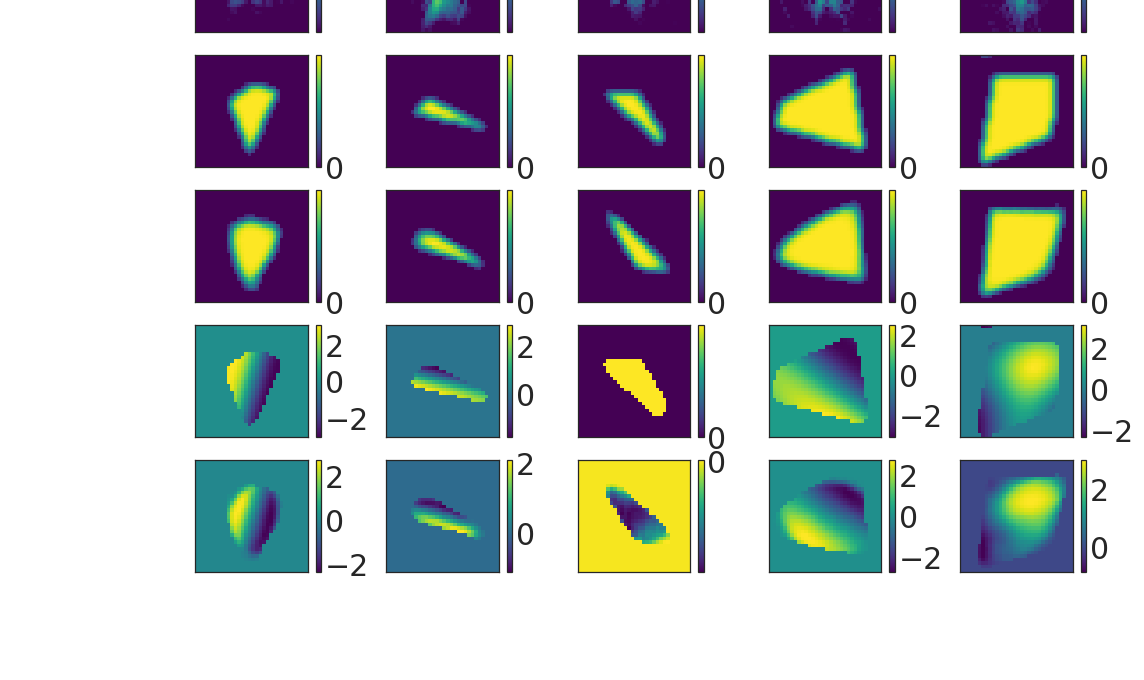

In [12]:
n = 6
ntest=10000
f,axp=plt.subplots(5,n,figsize=(20, 12))
from matplotlib import ticker
tick_locator = ticker.MaxNLocator(nbins=3)

indices=np.asarray([0,4000,200,510,500,8500]) #These are the examples shown in the paper.
for i in range(0,n):
#    j=int(round(np.random.rand()*ntest)) #Uncomment this line and comment the following one to show random test results
    j=indices[i]
    # display ground truth amplitude
    im=axp[1,i].imshow(real_intens_test[j].reshape(h, w))
    axp[1,i].get_xaxis().set_visible(False)
    axp[1,i].get_yaxis().set_visible(False)
    cb=plt.colorbar(im, ax=axp[1,i])
    cb.locator = tick_locator
    cb.update_ticks()
    
    # display ground truth phase
    im=axp[3,i].imshow(real_phase_test[j].reshape(h, w)) #Map the ground truth back to -pi to pi phases)
    axp[3,i].get_xaxis().set_visible(False)
    axp[3,i].get_yaxis().set_visible(False)
    cb=plt.colorbar(im, ax=axp[3,i])
    cb.locator = tick_locator
    cb.update_ticks()

    # display FT
    im=axp[0,i].imshow(np.log10(ft_test[j].reshape(h, w)))
    axp[0,i].get_xaxis().set_visible(False)
    axp[0,i].get_yaxis().set_visible(False)
    cb=plt.colorbar(im, ax=axp[0,i])
    cb.locator = tick_locator
    im.set_clim(1,3.5)
    cb.update_ticks()
    
    # display predicted amplitude
    im=axp[2,i].imshow(preds_intens[j].reshape(h, w))
    axp[2,i].get_xaxis().set_visible(False)
    axp[2,i].get_yaxis().set_visible(False)
    cb=plt.colorbar(im, ax=axp[2,i])
    cb.locator = tick_locator
    cb.update_ticks()
    
    # display predicted phase
    im=axp[4,i].imshow(preds_phase3[j].reshape(h, w))
    axp[4,i].get_xaxis().set_visible(False)
    axp[4,i].get_yaxis().set_visible(False)
    cb=plt.colorbar(im, ax=axp[4,i])
    cb.locator = tick_locator
    cb.update_ticks()
plt.show()